In [1]:
# loading the data
from sklearn import datasets
iris = datasets.load_iris(as_frame=True)

# keeping the sepal-length and sepal-width features
X = iris.data[["sepal length (cm)", "sepal width (cm)"]].values
y = iris.target

# keeping the setosa and virginica samples
setosa_or_virginica = (y == 0) | (y == 2)
X = X[setosa_or_virginica]
y = y[setosa_or_virginica]

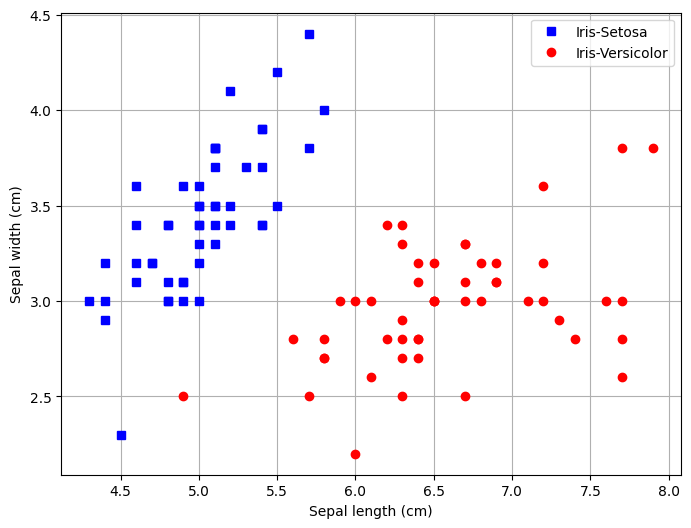

In [2]:
import matplotlib.pyplot as plt

# visualizing the data
fig = plt.figure(figsize=(8,6))
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris-Setosa")
plt.plot(X[:, 0][y==2], X[:, 1][y==2], "ro", label="Iris-Versicolor")
plt.xlabel("Sepal length (cm)")
plt.ylabel("Sepal width (cm)")
plt.legend()
plt.grid()
plt.show()

In [3]:
# defining a function that draws the decision boundary of a given SVM classifier
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0] / w[1] * x0 - b / w[1]
    
    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin
    svs = svm_clf.support_vectors_

    plt.plot(x0, decision_boundary, "k-", linewidth=2, zorder=-2)
    plt.plot(x0, gutter_up, "k--", linewidth=2, zorder=-2)
    plt.plot(x0, gutter_down, "k--", linewidth=2, zorder=-2)
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#AAA', zorder=-1)

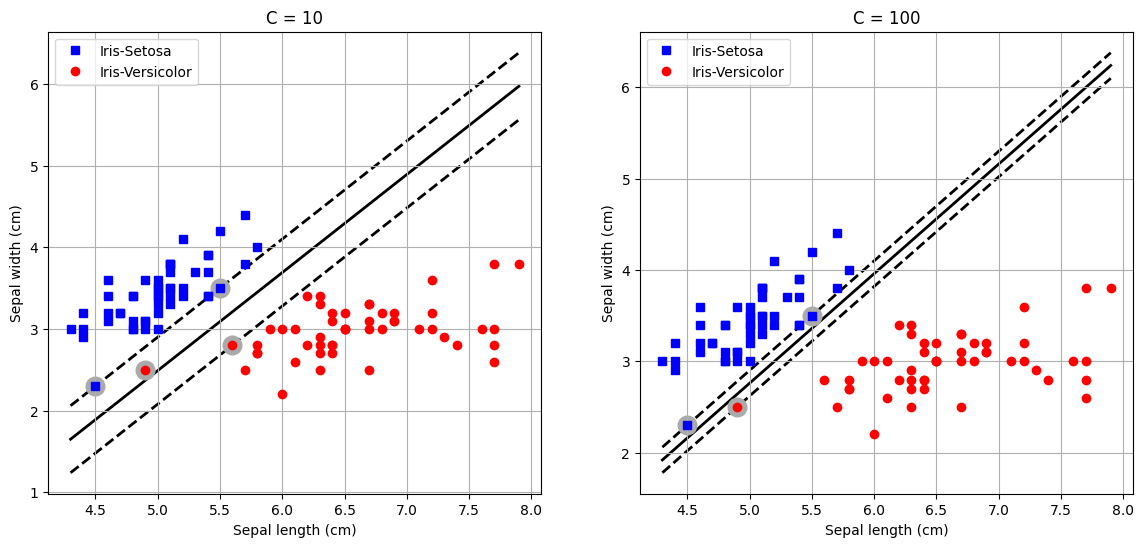

In [4]:
import numpy as np
from sklearn.svm import SVC

# training an SVM classifier with linear kernel and C = 10
svm_clf10 = SVC(kernel="linear", C=10)
svm_clf10.fit(X, y)

# training an SVM classifier with linear kernel and C = 100
svm_clf100 = SVC(kernel="linear", C=100)
svm_clf100.fit(X, y)

# visualizing our results
fig = plt.figure(figsize=(14, 6))
plt.subplot(121)
plt.title("C = 10")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris-Setosa")
plt.plot(X[:, 0][y==2], X[:, 1][y==2], "ro", label="Iris-Versicolor")

# plotting the decision boundary for C=10
plot_svc_decision_boundary(svm_clf10, min(X[:,0]), max(X[:,0]))
plt.xlabel("Sepal length (cm)")
plt.ylabel("Sepal width (cm)")
plt.legend()
plt.grid()

plt.subplot(122)
plt.title("C = 100")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris-Setosa")
plt.plot(X[:, 0][y==2], X[:, 1][y==2], "ro", label="Iris-Versicolor")

# plotting the decision boundary for C=100
plot_svc_decision_boundary(svm_clf100, min(X[:,0]), max(X[:,0]))

plt.xlabel("Sepal length (cm)")
plt.ylabel("Sepal width (cm)")
plt.legend()
plt.grid()
plt.show()

We observe that the lower value of C, i.e., C=10, concludes a more reliable and generalizable model, keeping the street as large as possible while eliminating the margin violations. On the other hand, C equal to 100, is very sensitive to outliers.

In [5]:
# training a logistic regression model
from sklearn.linear_model import LogisticRegression
softmax_reg = LogisticRegression(C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, random_state=42)

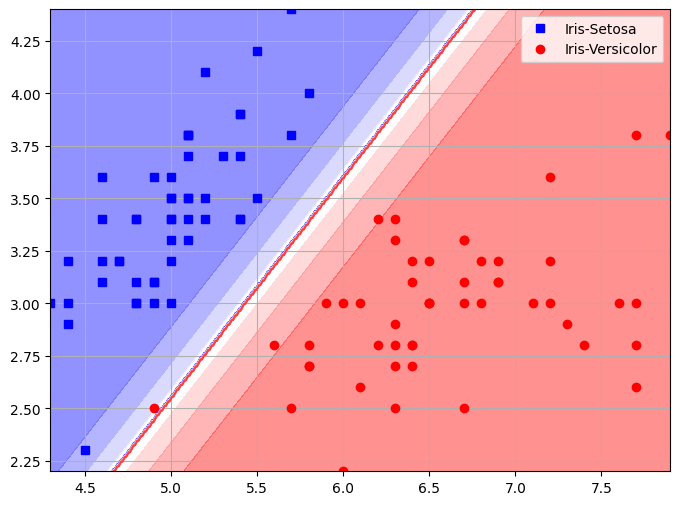

In [6]:
lengths, widths = np.meshgrid(np.linspace(min(X[:,0]), max(X[:,0]), 500).reshape(-1, 1),
                              np.linspace(min(X[:,1]), max(X[:,1]), 200).reshape(-1, 1))

X_new = np.c_[lengths.ravel(), widths.ravel()]

y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

probs = y_proba[:, 1].reshape(lengths.shape)
classes = y_predict.reshape(lengths.shape)

plt.figure(figsize=(8, 6))

plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris-Setosa")
plt.plot(X[:, 0][y==2], X[:, 1][y==2], "ro", label="Iris-Versicolor")

plt.contourf(lengths, widths, probs, alpha=0.5, cmap="bwr")
contour = plt.contour(lengths, widths, classes, cmap="bwr")

plt.legend()
plt.grid()
plt.show()

In [7]:
print(f"The probability of a sample being Iris setosa given that its sepal length is 5.5 cm and its sepal width is 3.25 cm is {100*softmax_reg.predict_proba([[5.5, 3.25]])[0][0]:.2f}%.")

The probability of a sample being Iris setosa given that its sepal length is 5.5 cm and its sepal width is 3.25 cm is 71.14%.
